In [25]:
import sys
sys.path.append('../cloud_classifier')

import cloud_trainer
import data_handler
import importlib
importlib.reload(cloud_trainer)
importlib.reload(data_handler)

ct = cloud_trainer.cloud_trainer()
dh = data_handler.data_handler()

In [26]:
data_1 = "../data/msevi-nawdex-20160920.nc"
labels_1 = "../data/nwcsaf_msevi-nawdex-20160920.nc"
data_2 = "../data/msevi-nawdex-20160925.nc"
labels_2 = "../data/nwcsaf_msevi-nawdex-20160925.nc"
data_3 = "../data/msevi-nawdex-20160930.nc"
labels_3 = "../data/nwcsaf_msevi-nawdex-20160930.nc"
mask = "../data/region_masks_for_msevi_nawdex.h5"


trv_name = "../training_vectors_1"
filename_cl = "../classifer_1"
filename_labels = "../predicted_labels_1.nc"

In [27]:
dh.add_training_files(data_1, labels_1)
dh.add_training_files(data_2, labels_2)
#dh.add_training_files(data_3, labels_3)

dh.set_indices_from_mask(mask, "mediterranean")
dh.set_extraction_parameters(samples = 1000, hours = range(24), difference_vectors = True, original_values = True)
dh.set_nwcsaf_version(in_version = "auto", out_version = "v2018")
dh.set_input_channels(input_channels = ['bt062', 'bt073', 'bt087', 'bt097', 'bt108', 'bt120', 'bt134'])

In [13]:
#v,l  = dh.create_training_set()
#dh.save_training_set(trv_name, v, l)
#v,l = dh.load_training_set(trv_name)

In [14]:
ct.set_training_paremeters("Forest")
ct.load_classifier(filename_cl)




(171396,)


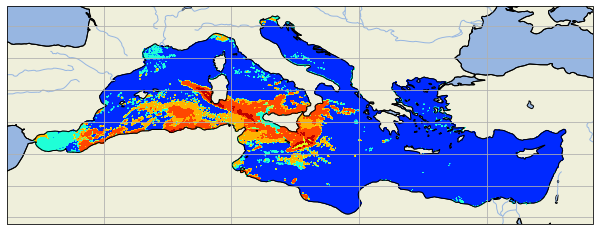

In [18]:
dh.plot_labels(filename = filename_labels)

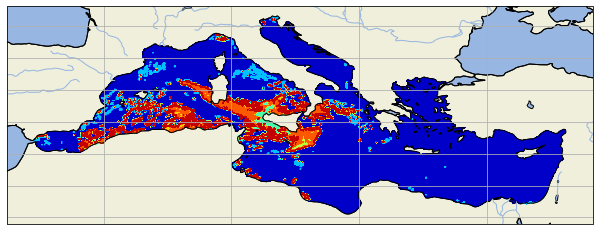

In [29]:
import xarray as xr
real_labels = xr.open_dataset(labels_3)
dh.plot_labels(labels = real_labels, hour = 0)